## Figure3-5 The plots of Total Annualised Cost per Household (TACH) and Total Annualised Cost per Capita (TACC) in faecal sludge management (FSM) components of infiltrating pit and sealed tank with infiltration (Int$2020). The top half of the box plot shows the TACH (left) and TACC (right) fractions, while the bottom half shows how the TACH (left) and TACC (right) are plotted against the number of households and population served.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [219]:
# variables
path_excel = r'data.xlsx'
sheetname = r'fsm containment'
dpi = 700
file_path = r'fig3-5_fsm_containment_cost.png'

plt.rcParams['font.size'] = 14


In [220]:
# create boxplots by given parameters
def createBoxPlot(
    path_excel,
    sheetname,
    ax, 
    groupby_col, 
    value_col, 
    title, 
    xlabel, 
    ylabel,
    max_y,
    min_y,
    duration_y
):
    df = pd.read_excel(path_excel, sheet_name=sheetname)
    
    groups = df.groupby(groupby_col)
    print(groups)
    data = [group[1][value_col] for group in groups]

    bp = ax.boxplot(data)
    
    # make median line black
    for median in bp['medians']:
        median.set_color('black')
    
    for i, box in enumerate(bp['boxes']):
        x_pos = box.get_xdata().mean()

        # get values from boxplot
        med = np.median(data[i])
        q1, q3 = np.percentile(data[i], [25, 75])
        whisker_min, whisker_max = [whisker.get_ydata()[1] for whisker in bp['whiskers'][i*2:i*2+2]]
        cap_min, cap_max = [cap.get_ydata()[1] for cap in bp['caps'][i*2:i*2+2]]
        outliers = bp['fliers'][i].get_ydata()

        # show value label
        ax.text(x_pos + 0.15, med, f"{med:.0f}", ha='center', va='center', fontsize=12)
        ax.text(x_pos + 0.15, q1, f"{q1:.0f}", ha='center', va='center', fontsize=12)
        ax.text(x_pos + 0.15, q3, f"{q3:.0f}", ha='center', va='center', fontsize=12)
        ax.text(x_pos - 0.1, cap_min, f"{cap_min:.0f}", ha='center', va='top', fontsize=12)
        ax.text(x_pos - 0.1, cap_max, f"{cap_max:.0f}", ha='center', va='bottom', fontsize=12)  
        for outlier in outliers:
            ax.text(x_pos + 0.1, outlier, f"{outlier:.0f}", ha='center', va='bottom', fontsize=10, color='k')

    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xticklabels(groups.groups.keys())
    
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')
    
    ax.set_yticks(np.arange(min_y, max_y, duration_y))


In [223]:
# create scatterplots by given parameters
def createScatterPlot(
    path_excel,
    sheetname, 
    ax,
    groupby_col,
    x_col,
    y_col,
    title, 
    x_label,
    y_label,
    markers = ['o', '^'],
    trendline_style = ['--', ':'],
    colormap = 'tab10',
    
):
    data = pd.read_excel(path_excel, sheet_name=sheetname)
    
    color_map = plt.get_cmap(colormap)

    components = data[groupby_col].unique()
    for i, component in enumerate(components):
        df = data[data[groupby_col]==component]
        color = color_map(i)
        ax.scatter(df[x_col], df[y_col], marker=markers[i], label=component, color=color)

        # Add trendline
        z = np.polyfit(df[x_col], df[y_col], 1)
        p = np.poly1d(z)
        x = np.linspace(df[x_col].min(), df[x_col].max(), 2)
        ax.plot(x, p(x), linestyle=trendline_style[i], color=color, label=f'{component} Trendline')

    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.legend()
    ax.grid(which='both')

<function matplotlib.pyplot.show(close=None, block=None)>

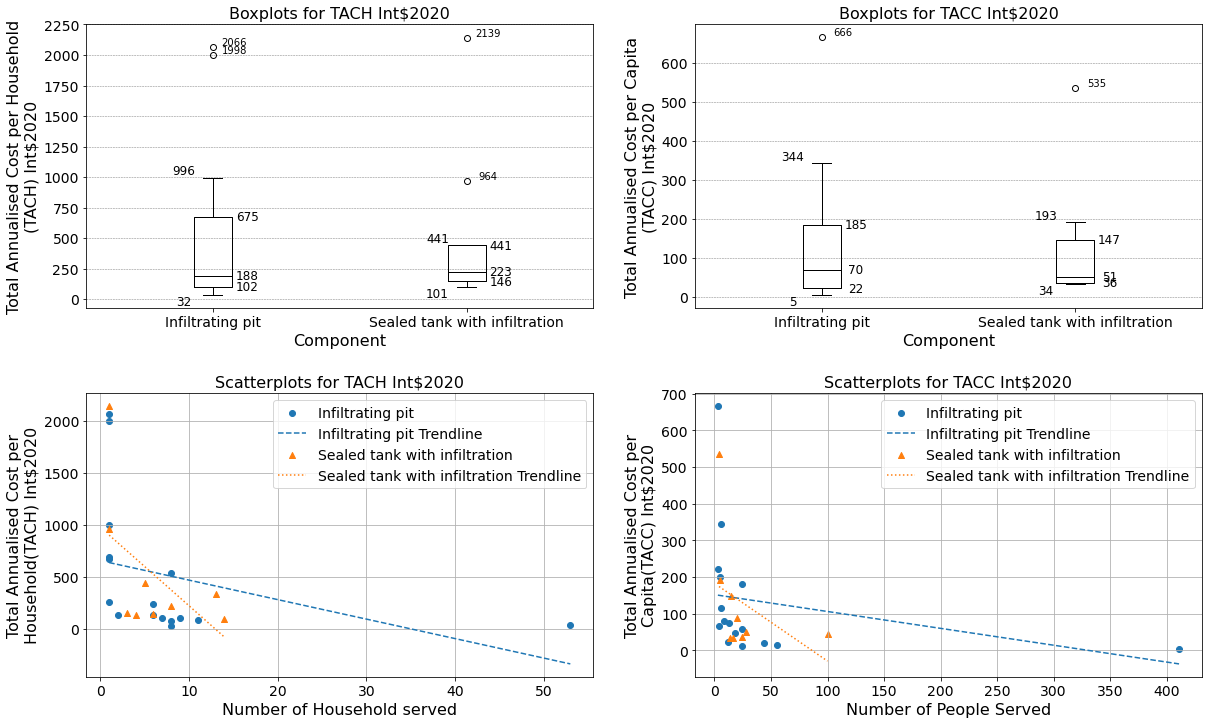

In [224]:
fig = plt.figure(figsize=(20, 12))

ax1 = fig.add_subplot(2, 2, 1)

createBoxPlot(
    path_excel,
    sheetname,
    ax1, 
    groupby_col = 'Component', 
    value_col = 'TACH', 
    title = 'Boxplots for TACH Int$2020', 
    xlabel = 'Component', 
    ylabel = 'Total Annualised Cost per Household\n(TACH) Int$2020',
    max_y = 2500,
    min_y = 0,
    duration_y = 250
)

ax2 = fig.add_subplot(2, 2, 2)

createBoxPlot(
    path_excel,
    sheetname, 
    ax2, 
    groupby_col = 'Component', 
    value_col = 'TACC', 
    title = 'Boxplots for TACC Int$2020', 
    xlabel = 'Component', 
    ylabel = 'Total Annualised Cost per Capita\n(TACC) Int$2020',
    max_y = 700,
    min_y = 0,
    duration_y = 100
)

ax3 = fig.add_subplot(2, 2, 3)
createScatterPlot(
    path_excel,
    sheetname, 
    ax3,
    groupby_col = 'Component',
    x_col = 'Number of Household served',
    y_col = 'TACH',
    title = 'Scatterplots for TACH Int$2020',
    x_label = 'Number of Household served',
    y_label = 'Total Annualised Cost per\nHousehold(TACH) Int$2020'
)

ax4 = fig.add_subplot(2, 2, 4)
createScatterPlot(
    path_excel,
    sheetname, 
    ax4,
    groupby_col = 'Component',
    x_col = 'Number of People Served',
    y_col = 'TACC',
    title = 'Scatterplots for TACC Int$2020',
    x_label = 'Number of People Served',
    y_label = 'Total Annualised Cost per\nCapita(TACC) Int$2020'
)

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.savefig(file_path, format="png", dpi=dpi, transparent=True, bbox_inches='tight')
plt.show